# Mid Sem Report

**Index**
1. Introduction [goto](#intro)
2. Data Discussion [goto](#data)
3. Baseline [goto](#baseline)
4. Discussion [goto](#discussion)

<a id='intro'></a>
## Introduction

Media has to be written in a style that is liked by their target audience in order to get a subscribing customer base. So we'd expect the news publisher, Vice News, to usually write in a style and subject that appeals to a younger bohemian reader base, on the other hand, Fox News would expectedly write in a style for older more conservative types.

Then ideally, we should then therefore be able to come up with a framework about the type of vocabulary and subject matter that each publisher would be writing about.

Our project is just that, we want to use Natural Language Processing AI (NLP) methods to be able to determine the variations between 15 different new publishers. We want to create a system that would be able to accurately explore the diversity in news publishing. 

This will all be done with a [kaggle dataset](https://www.kaggle.com/snapcrack/all-the-news) containing around 150,000 new articles, with only the article content being our primary predictor for publication source.

<a id='data'></a>
## Data Exploration
### Preliminary 

In [2]:
import pandas as pd
import numpy as np

# Append all csv files
df = pd.read_csv('../../data/news/articles1.csv')
df = df.append(pd.read_csv('../../data/news/articles2.csv'))
df = df.append(pd.read_csv('../../data/news/articles3.csv'))

# Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Splitting
parts = {
    'train':int(len(df)*0.7), 
    'dev':int(len(df)*0.15)+1, 
    'test':int(len(df)*0.15)+1
}

X = y = {key:None for key in list(parts.keys())}
X['train'] = df['content'][:parts['train']]
X['dev'] = df['content'][parts['train']:parts['dev']]
X['test'] = df['content'][parts['train']:]

y['train'] = df['publication'][:parts['train']]
y['dev'] = df['publication'][parts['train']:parts['dev']]
y['test'] = df['publication'][parts['train']:]

First we'll take a look at the distributions of all classes in our dataset.

#### Distributions of all classes

We have to do this because it may affect whether or not a machine will bias towards one class or not if the distribution of classes isn't uniformly distributed.

Text(0,0.5,'Count')

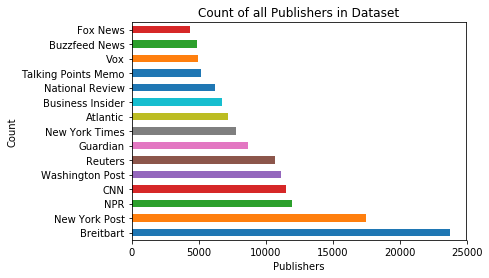

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

counts = df['publication'].value_counts() 
counts.plot.barh()
plt.title('Count of all Publishers in Dataset')
plt.xlabel('Publishers')
plt.ylabel('Count')

Visually there is a huge disparity between our max `Breitbart` and our min `Fox News` and it may affect our learning, it can be expected that our AI might not be able to properly identify posts from the publishers with less articles.

We might have to duplicate our minimum publishers with filler articles so that our classes can be uniformly distributed.

We'll now look at the word counts.

#### Average word counts throughout entire corpus

This has to be done because we must see if our articles are actually beefy enough and full of nutritious delicious information. The individual documents could actually just be bare bones for all we know.

I'll keep stopwords because I feel that some publishers may veer to certain strong pattern words. 

E.g. Propaganda in the olden days used `We` `Us` a lot, versus a modern legal document which may include no `We`s or `Us`s at all.

In [25]:
import re

sum_ = 0
for article in df['content'][:3000]:
    re.sub(r'\W', '', article)
    sum_ += len(article.split())
sum_/3000

721.2713333333334

Overall, is not a bad word count as an average.

In [37]:
pubs = list(counts.keys())
means = []
for pub in pubs:
    i = 0
    sum_ = 0
    counter_ = 0
    for i in range(4000):
        if df['publication'][i] == pub:
            article = df['content'][i]
            re.sub(r'\W', '', article)
            sum_ += len(article.split())
            counter_ += 1
    means.append(sum_/counter_)

Text(0,0.5,'Averages')

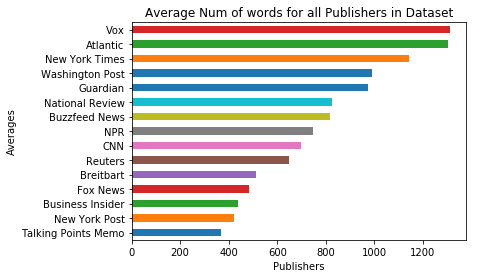

In [43]:
pub_avgs = pd.Series(means, index=pubs)
pub_avgs.sort_values().plot.barh()
plt.title('Average Num of words for all Publishers in Dataset')
plt.xlabel('Publishers')
plt.ylabel('Averages')

This makes a very interesting dynamic. As discussed earlier, since we might have to duplicate articles to make a uniformly distributed sample these averages say that some of the publishers with lower article counts have large word counts on average.

<a id='baseline'></a>
## Baseline

<a id='discussion'></a>
## Discussion